DIVA

In [23]:
%matplotlib inline
import os
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [24]:
from SensorimotorExploration.DataManager.SimulationData import load_sim_h5_v2 as load_sim_h5
from SensorimotorExploration.DataManager.PlotTools import *

def incremental_mean(arr_):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(n_samples):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    out = np.array(out).flatten()
    return out

def moving_av(arr_, win_sz):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(win_sz):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    for i in range(win_sz,n_samples):
        sum_ = sum_ + arr_[i] - arr_[i-win_sz]
        out += [sum_/win_sz]
    out = np.array(out).flatten()
    return out

In [49]:
data_file = "parabola_var_social_thresh/Parabola_Pool_116_2017_07_27_18_07_sim_data.h5"


conf_file =  data_file.replace('sim_data.h5', 'conf.txt')
conf = {}
with open(conf_file) as f:
    for line in f:
        line = line.replace('\n', '')
        (key, val) = line.split(': ')
        conf[key] = val

#Simulation_data
data, foo = load_sim_h5(data_file)

#Interactions
interaction_data = data.social.data.as_matrix(columns=None)
interactions = np.zeros((interaction_data.shape[0],))
interactions[~np.isnan(interaction_data[:, 0])] = 1

sim_contact = data.cons.data.as_matrix()        
sim_sensor_error_ = np.linalg.norm(data.sensor_goal.data.as_matrix() -
                                  data.sensor.data.as_matrix(), axis=1)
sim_somato_error_ = np.linalg.norm(data.somato_goal.data.as_matrix() -
                          data.somato.data.as_matrix(), axis=1)

#Sensor evaluation data
eva_sensor_data, foo = load_sim_h5(data_file.replace('sim_data.h5', 'sensori_sensor_eva_valset.h5'))
sensor_eva_error_ = np.linalg.norm(eva_sensor_data.sensor_goal.data.as_matrix() -
                          eva_sensor_data.sensor.data.as_matrix(), axis=1)
sensor_eva_contact_ = eva_sensor_data.cons.data.as_matrix()

sim_eva_errors = []
with open(data_file.replace('sim_data.h5', 'eval_error.txt'), 'r') as f:
    for line in f:
        line.replace('\n','')
        eva_errors_str = line.split(': ')
        sim_eva_errors += [float(eva_errors_str[1])] 
        
sim_eva_errors = np.array(sim_eva_errors)

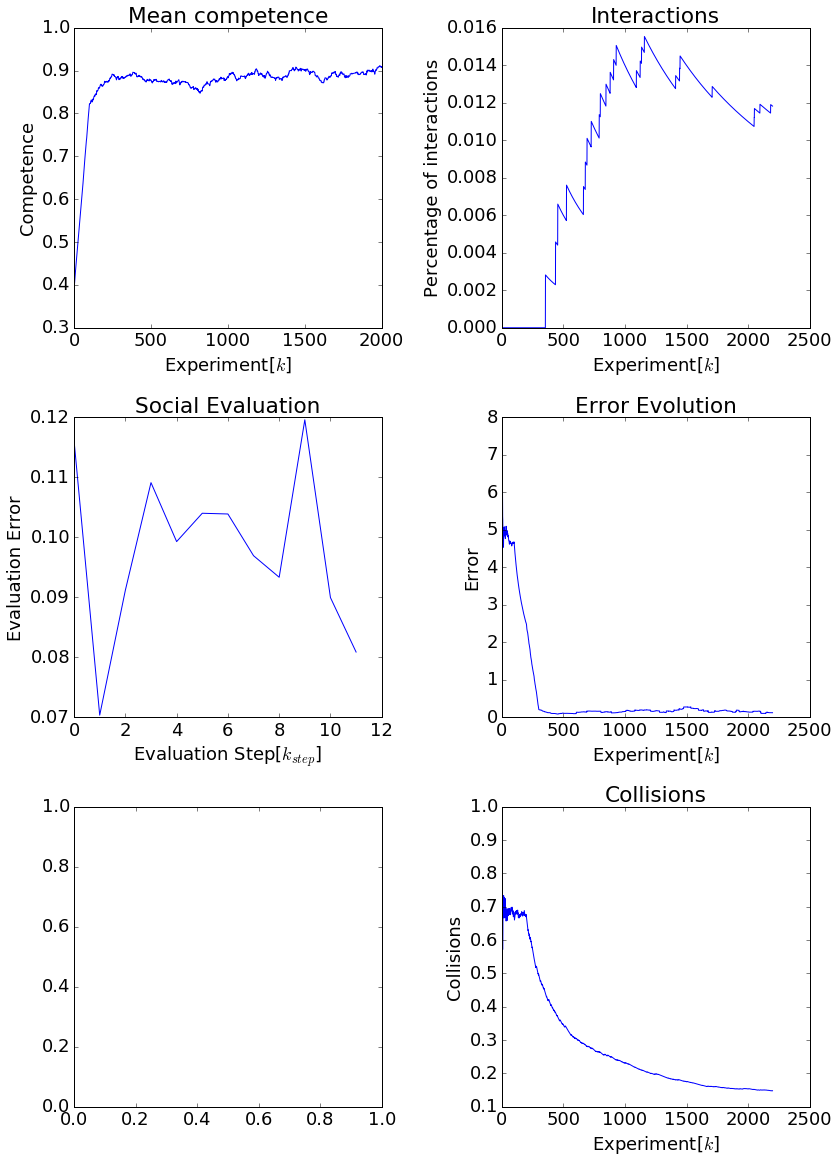

In [50]:
matplotlib.rcParams['figure.figsize'] = (12.0, 16.5)
matplotlib.rcParams.update({'font.size': 18})

##FIG 1
fig1, ax1 = plt.subplots(3,2)

plt.sca(ax1[0,0])
ax1[0,0].set_title('Mean competence')
data.plot_time_series('competence',0,moving_average=200,axes=ax1[0,0])
plt.xlabel('Experiment[$k$]')
plt.ylabel('Competence')
plt.tight_layout()

plt.sca(ax1[0,1])
ax1[0,1].set_title('Interactions')
plt.plot(incremental_mean(interactions))
plt.xlabel('Experiment[$k$]')
plt.ylabel('Percentage of interactions')
plt.tight_layout()

plt.sca(ax1[1,0])
ax1[1,0].set_title('Social Evaluation')
plt.plot(sim_eva_errors)
plt.xlabel('Evaluation Step[$k_{step}$]')
plt.ylabel('Evaluation Error')
plt.tight_layout()

plt.sca(ax1[1,1])
ax1[1,1].set_title('Error Evolution')
plt.plot(moving_av(sim_sensor_error_,win_sz=200))
plt.xlabel('Experiment[$k$]')
plt.ylabel('Error')
plt.tight_layout()

plt.sca(ax1[2,1])
ax1[2,1].set_title('Collisions')
plt.plot(incremental_mean(data.cons.data.as_matrix()))
plt.xlabel('Experiment[$k$]')
plt.ylabel('Collisions')
plt.tight_layout()


In [24]:
# # fig1.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/Epirob 2017/images/vt_results.eps',\
# #              format='eps', dpi=1000,bbox_extra_artists=(lgd,), bbox_inches='tight')
# fig1.savefig(directory + 'vt_results.eps',\
#              format='eps', dpi=1000,bbox_extra_artists=(lgd,), bbox_inches='tight')

sum(interactions)/20000

0.0054999999999999997

In [30]:
np.sum(data.competence.data)/20000

competence    0.167755
dtype: float64